In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 143MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [ ]:
df.shape

(19820, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

In [ ]:
df['make'].nunique()

41

In [ ]:
df['model'].nunique()

3233

In [ ]:
#OHE - Bad choice - Curse of dimensionality

In [ ]:
#Label Encoding - Bad choice - Non ordinal data

In [ ]:
#Target Encoding - Good choice - Nominal feature

In [ ]:
#Target Encoding

In [ ]:
df['make'].unique()

array(['MARUTI', 'HYUNDAI', 'FORD', 'MAHINDRA', 'TATA', 'RENAULT',
       'NISSAN', 'MINI', 'MERCEDES-BENZ', 'TOYOTA', 'FIAT', 'VOLKSWAGEN',
       'HONDA', 'CHEVROLET', 'AMBASSADOR', 'DATSUN', 'KIA', 'BMW',
       'MITSUBISHI', 'AUDI', 'SKODA', 'LAND', 'JAGUAR', 'DAEWOO',
       'BENTLEY', 'MG', 'ISUZU', 'PORSCHE', 'VOLVO', 'LEXUS', 'JEEP',
       'PREMIER', 'MASERATI', 'FORCE', 'LAMBORGHINI', 'FERRARI',
       'OPELCORSA', 'MERCEDES-AMG', 'DC', 'ROLLS-ROYCE', 'OPEL'],
      dtype=object)

In [ ]:
# Compute average selling price per make
avg_prices = df.groupby('make')['selling_price'].mean().reset_index()

# Find duplicates in avg selling price
duplicates = avg_prices[avg_prices.duplicated(subset=['selling_price'], keep=False)]

print(duplicates)


            make  selling_price
2        BENTLEY        20.9025
8        FERRARI        20.9025
18   LAMBORGHINI        20.9025
20         LEXUS        20.9025
23      MASERATI        20.9025
24  MERCEDES-AMG        20.9025
35   ROLLS-ROYCE        20.9025


In [ ]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['make']

#avg selling price per company

,make
0,4.684721
1,5.458819
2,5.458819
3,4.684721
4,5.858258
...,...
19815,10.532763
19816,4.684721
19817,7.182097
19818,7.315421


In [ ]:
df['make'].nunique()

35

In [ ]:
df['make'].duplicated().value_counts()

,count
make,
True,19785
False,35


In [ ]:
df['model'] = df.groupby('model')['selling_price'].transform('mean')

In [ ]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  float64
 8   model             19820 non-null  float64
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

In [ ]:
#Lets find the operating range of values each feature
num_cols = df.select_dtypes(include=['number']).columns
ranges = df[num_cols].max() - df[num_cols].min()

for col, val in ranges.items():
    print(f"{col}: {val:.2f}")


selling_price: 20.60
year: 29.00
km_driven: 3799900.00
mileage: 116.00
engine: 6752.00
max_power: 621.00
age: 29.00
make: 20.12
model: 20.58
Individual: 1.00
Trustmark Dealer: 1.00
Diesel: 1.00
Electric: 1.00
LPG: 1.00
Petrol: 1.00
Manual: 1.00
5: 1.00
>5: 1.00


In [ ]:
#Not scaled
#Standardization over Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [ ]:
X_new = scaler.fit_transform(X)
X_new

array([[-8.01316544e-01,  1.19582817e+00,  4.57451688e-02, ...,
         4.95818203e-01,  4.44503185e-01, -4.24728453e-01],
       [ 4.50030281e-01, -7.37872078e-01, -1.40401980e-01, ...,
         4.95818203e-01,  4.44503185e-01, -4.24728453e-01],
       [-1.42698996e+00,  3.56080197e-02, -5.82501459e-01, ...,
         4.95818203e-01,  4.44503185e-01, -4.24728453e-01],
       ...,
       [ 1.37193575e-01,  1.70967037e-01,  3.80810037e-01, ...,
         4.95818203e-01,  4.44503185e-01, -4.24728453e-01],
       [ 4.50030281e-01,  7.23559971e+01, -8.15185395e-01, ...,
         4.95818203e-01, -2.24970266e+00,  2.35444551e+00],
       [ 1.38854040e+00, -8.73231095e-01, -3.49817523e-01, ...,
        -2.01686827e+00,  4.44503185e-01, -4.24728453e-01]])

In [ ]:
X = pd.DataFrame(X_new, columns = X.columns)
X

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.523162,-1.151966,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.310104,-0.376513,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.310104,-0.680141,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.523162,-0.925500,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.200164,0.040931,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,0.762867,0.218923,0.950886,-0.215410,-0.694202,-0.762867,1.086420,0.104315,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728
19816,1.388540,-0.776546,-0.466159,-0.198054,-0.156899,-1.388540,-0.523162,0.115732,-0.800710,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,-2.249703,2.354446
19817,0.137194,0.170967,0.380810,0.042999,0.120577,-0.137194,0.164202,-0.454245,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728
19818,0.450030,72.355997,-0.815185,1.356256,0.935579,-0.450030,0.200897,0.322012,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,-2.249703,2.354446


In [ ]:
df


,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,6.50,2017.0,69480,23.59,1364.0,67.05,6.0,10.532763,7.075000,0,0,1,0,0,0,1,1,0
19816,9.25,2019.0,18000,17.50,1373.0,91.10,4.0,4.684721,7.128571,0,0,0,0,0,1,1,0,1
19817,4.25,2015.0,67000,21.14,1498.0,103.52,8.0,7.182097,4.454000,0,0,1,0,0,0,1,1,0
19818,12.25,2016.0,3800000,16.00,2179.0,140.00,7.0,7.315421,8.096522,0,0,1,0,0,0,1,0,1


In [ ]:
X.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.523162,-1.151966,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.310104,-0.376513,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.310104,-0.680141,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.523162,-0.925500,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.200164,0.040931,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
y.head()

,selling_price
0,1.20
1,5.50
2,2.15
3,2.26
4,5.70


In [ ]:
#Re-doing the steps from top till standardization

In [ ]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [ ]:
df['make'].nunique(), df['model'].nunique()

(41, 3233)

In [ ]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')

In [ ]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [ ]:
X.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((15856, 17), (3964, 17))

In [ ]:
y_train.shape, y_test.shape

((15856,), (3964,))

In [ ]:
X_train.ndim, X_test.ndim

(2, 2)

In [ ]:
y_train.ndim, y_test.ndim

(1, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_new = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_new, columns = X_train.columns)

In [ ]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.489414,0.502456,0.243228,0.240112,0.120997,0.489414,-0.284819,-0.599662,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,-1.429050,0.900732,-0.799809,1.011304,1.854161,1.429050,2.975929,0.929139,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,-2.012782,0.443384,-0.423776
2,1.076647,0.366270,1.841617,-0.439780,-0.541816,-1.076647,-0.521072,0.064971,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,1.389859,-0.972890,1.013255,-0.534965,-0.317892,-1.389859,-0.604885,-0.206702,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,-2.055474,1.183386,-1.399497,0.630564,0.712154,2.055474,-0.163433,-0.799491,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [ ]:
X_new = scaler.transform(X_test)

X_test = pd.DataFrame(X_new, columns = X_test.columns)

In [ ]:
X_test.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.763435,0.502456,0.499903,-0.026017,-0.299979,-0.763435,-0.542630,-0.456837,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,0.137011,0.082550,0.149891,0.045857,-0.210409,-0.137011,-0.284819,-0.330968,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
2,0.450223,0.307257,1.820617,0.045857,0.009035,-0.450223,-0.163433,-0.206702,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,0.450223,-0.623074,-0.186121,-0.534965,-0.212649,-0.450223,-0.163433,-0.176406,-0.799289,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,-0.802626,0.048503,0.331897,-0.925417,-0.696322,0.802626,-0.521072,-0.927358,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


#Implementation (Simple LR)

In [ ]:
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [ ]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_, model.intercept_)

[4.67289908] 6.578468924697273


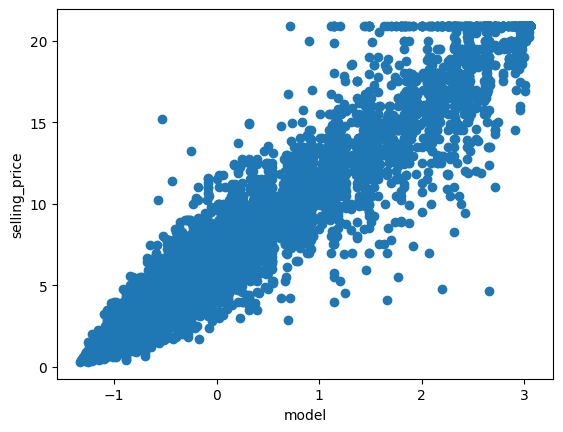

In [ ]:
plt.scatter(X1_train, y_train)
plt.xlabel('model')
plt.ylabel('selling_price')
plt.show()

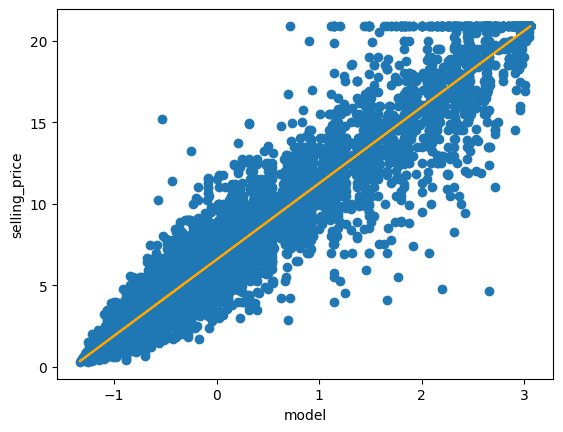

In [ ]:
plt.scatter(X1_train, y_train)
plt.plot(X1_train, model.predict(X1_train), color='orange')
plt.xlabel('model')
plt.ylabel('selling_price')
plt.show();

In [ ]:
y_pred = model.predict(X1_test)

In [ ]:
X1_test

,model
0,-0.456837
1,-0.330968
2,-0.206702
3,-0.176406
4,-0.927358
...,...
3959,-0.705864
3960,3.063152
3961,-1.067924
3962,-0.670769


In [ ]:
y_pred[:10]

array([ 4.44371573,  5.03189066,  5.61257064,  5.75414187,  2.24501683,
       11.41615833,  2.31729205,  4.24266079,  5.62397599,  1.13683782])

#LR2

In [ ]:
model.score(X1_train, y_train) #performance metric - R^2

0.9361429280197991

In [ ]:
model.score(X1_test, y_test)

0.940979262430343

In [ ]:
#Multivariate Linear Regression

In [ ]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.489414,0.502456,0.243228,0.240112,0.120997,0.489414,-0.284819,-0.599662,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,-1.429050,0.900732,-0.799809,1.011304,1.854161,1.429050,2.975929,0.929139,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,-2.012782,0.443384,-0.423776
2,1.076647,0.366270,1.841617,-0.439780,-0.541816,-1.076647,-0.521072,0.064971,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,1.389859,-0.972890,1.013255,-0.534965,-0.317892,-1.389859,-0.604885,-0.206702,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,-2.055474,1.183386,-1.399497,0.630564,0.712154,2.055474,-0.163433,-0.799491,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [ ]:
X_train.shape, y_train.shape

((15856, 17), (15856,))

In [ ]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model2.coef_, model2.intercept_)

[ 0.27813197 -0.14013565 -0.18590768  0.13924039  0.04679916 -0.27813197
  0.24605178  4.02063257 -0.05837169 -0.01638025  0.06013809  0.04818182
  0.01863947 -0.10007882 -0.03729704 -0.09549806 -0.15212018] 6.5784689246972645


In [ ]:
y_pred = model2.predict(X_test)
y_pred[:10]

array([ 4.9405943 ,  5.41944515,  5.79134646,  6.00483191,  1.8135126 ,
       11.784341  ,  2.07682075,  4.16500267,  5.21875115,  0.27207412])

In [ ]:
model2.score(X_train,y_train) #R2 score multi variate LR

0.9453672329447975

In [ ]:
model2.score(X_test, y_test) #R2 score  multi variate LR

0.9466197443095883

In [ ]:
model.score(X1_test, y_test) #Simple LR model

0.940979262430343

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

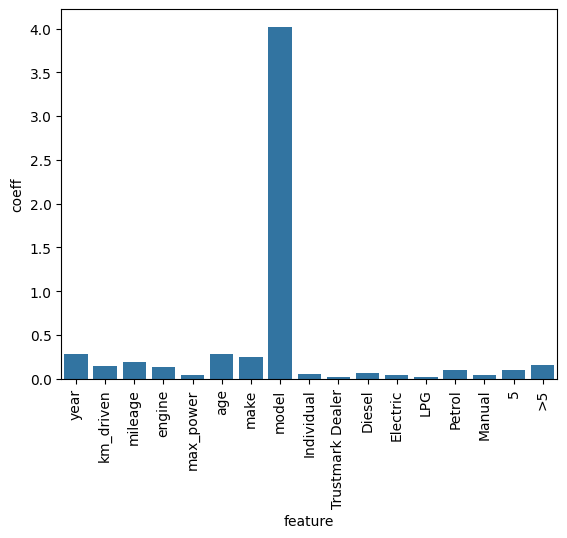

In [ ]:
import seaborn as sns

imp = pd.DataFrame(list(zip(X_train.columns,np.abs(model2.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
def r2_score(y_true, y_pred):
    numerator = np.sum((y_true - y_pred)**2)
    denominator = np.sum((y_true - y_true.mean())**2)
    score = 1 - (numerator/denominator)
    return score

In [ ]:
r2_score(y_train, model2.predict(X_train)) # multi variate LR

np.float64(0.9453672329447975)

In [ ]:
r2_score(y_test, model2.predict(X_test)) # multi variate LR

np.float64(0.9466197443095883)

In [ ]:
# Predict Y using X and current weights
def predict(X, weights):
    return np.dot(X, weights)

# Calculate Mean Squared Error (MSE)
def loss(X, Y, weights):
    Y_hat = predict(X, weights)               # Model prediction
    err = np.mean((Y - Y_hat)**2) #element wise subtraction # Mean of squared errors
    return err

# Calculate gradient of the loss function w.r.t. weights
def gradients(X, Y, weights):
    Y_hat = predict(X, weights)               # Model prediction
    grad = 2 * np.dot(X.T, (Y_hat - Y)) / len(Y)  # Gradient formula for MSE
    return grad

# Gradient descent function to train the model
def gradient_descent1(X, Y, learning_rate=0.1, n_itrs=300):
    n_samples, n_features = X.shape
    print("Shape of X:", X.shape)

    error_list = []                           # To track error at each iteration

    # Step 1: Initialize weights randomly
    weights = np.random.rand(n_features)

    # Step 2: Iterate and update weights
    for _ in range(n_itrs):
        current_loss = loss(X, Y, weights)    # Calculate current error
        error_list.append(current_loss)       # Store error for analysis

        grad = gradients(X, Y, weights)       # Compute gradient
        weights = weights - learning_rate * grad  # Update weights

    return weights, error_list

# Train the model
W_best, error_list = gradient_descent1(X_train, y_train, learning_rate=0.1)



Shape of X: (15856, 17)


In [ ]:
W_best

array([ 5.52952045e-01, -1.40080081e-01, -1.74474623e-01,  1.36033442e-01,
        5.27878078e-02, -1.07810385e-03,  2.50863430e-01,  4.01618698e+00,
       -5.99383449e-02, -1.54886932e-02,  1.60624927e-01,  4.95888490e-02,
        3.06858942e-02,  4.93465367e-03, -3.80007555e-02, -6.24283520e-02,
       -1.11580841e-01])

In [ ]:
error_list[:5]

[np.float64(62.30047140869603),
 np.float64(48.255755817597326),
 np.float64(46.78617759072019),
 np.float64(46.29981726637431),
 np.float64(46.065475578346394)]

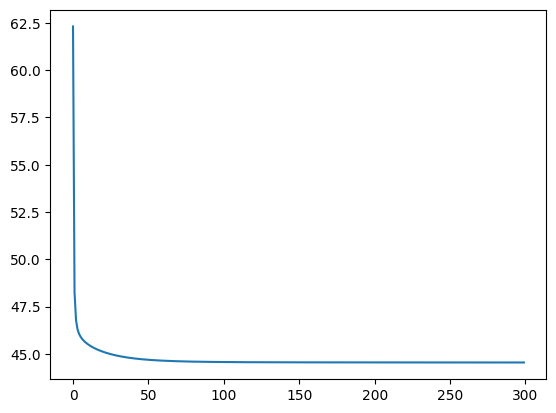

In [ ]:
plt.plot(error_list)

In [ ]:
#LR3

In [ ]:
y_train_pred = predict(X_train, W_best)
y_train_pred[:10]

array([-2.7418689 ,  4.23635383,  0.34852162, -0.57048921, -4.41747879,
        0.89786201, -1.66046133, -0.57797448, -7.28663716, -4.24693969])

In [ ]:
r2_score(y_train, y_train_pred)

np.float64(-0.9099879437195004)

In [ ]:
y_pred = predict(X_test, W_best)
y_pred[:10]

array([-1.64202425, -1.16160003, -0.76993857, -0.56994499, -4.75574493,
        5.21509768, -4.50931272, -2.41017816, -1.35607449, -6.29812636])

In [ ]:
r2_score(y_test, y_pred)

np.float64(-0.8479951857036938)

In [ ]:
#Incorporate w0

In [ ]:
x0 = pd.DataFrame([1]*len(X_train), columns = ['x0'])

In [ ]:
X_train_new = pd.concat([x0, X_train], axis=1)
X_train_new.head()

,x0,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1,-0.489414,0.502456,0.243228,0.240112,0.120997,0.489414,-0.284819,-0.599662,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,1,-1.429050,0.900732,-0.799809,1.011304,1.854161,1.429050,2.975929,0.929139,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,-2.012782,0.443384,-0.423776
2,1,1.076647,0.366270,1.841617,-0.439780,-0.541816,-1.076647,-0.521072,0.064971,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,1,1.389859,-0.972890,1.013255,-0.534965,-0.317892,-1.389859,-0.604885,-0.206702,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,1,-2.055474,1.183386,-1.399497,0.630564,0.712154,2.055474,-0.163433,-0.799491,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [ ]:
W_best, error_list = gradient_descent1(X_train_new, y_train)

Shape of X: (15856, 18)


In [ ]:
W_best

array([ 6.57846892,  0.92410144, -0.14031711, -0.17264555,  0.13651992,
        0.05320113,  0.37114673,  0.25114892,  4.01667585, -0.05986194,
       -0.01546415,  0.16125482,  0.04918582,  0.03089184,  0.00692609,
       -0.03820606, -0.04794767, -0.09641918])

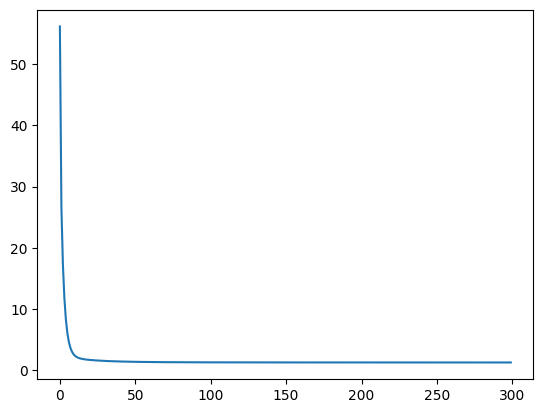

In [ ]:
plt.plot(error_list)

In [ ]:
error_list[-5:]

[np.float64(1.2753338462500905),
 np.float64(1.2753201199858937),
 np.float64(1.2753065861889037),
 np.float64(1.2752932420858847),
 np.float64(1.2752800849454686)]

In [ ]:
y_train_pred = predict(X_train_new, W_best)
y_train_pred[:10]

array([ 3.83592689, 10.81628633,  6.92724182,  6.00931025,  2.1619307 ,
        7.47526158,  4.91595144,  6.00150907, -0.70441367,  2.33129335])

In [ ]:
r2_score(y_train, y_train_pred)

np.float64(0.9453273006404411)

In [ ]:
r2_score(y_test, model2.predict(X_test))

np.float64(0.9466197443095883)

In [ ]:
#Adjusted R2

In [ ]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.489414,0.502456,0.243228,0.240112,0.120997,0.489414,-0.284819,-0.599662,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,-1.429050,0.900732,-0.799809,1.011304,1.854161,1.429050,2.975929,0.929139,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,-2.012782,0.443384,-0.423776
2,1.076647,0.366270,1.841617,-0.439780,-0.541816,-1.076647,-0.521072,0.064971,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,1.389859,-0.972890,1.013255,-0.534965,-0.317892,-1.389859,-0.604885,-0.206702,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,-2.055474,1.183386,-1.399497,0.630564,0.712154,2.055474,-0.163433,-0.799491,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [ ]:
y_train.head()

,selling_price
5662,5.25
4556,8.25
7094,7.50
1441,5.70
17079,4.00


In [ ]:
r2 = model2.score(X_test, y_test)
r2

0.9466197443095883

In [ ]:
n, d = X_test.shape
print(n, d)

3964 17


In [ ]:
adj_r2 = 1 - ((1-r2) * (n-1) / (n-d-1))
print(adj_r2)

0.9463897736185753


In [ ]:
adj_r2 = 1 - ((1-r2) * (n-1) / (n-(d+1000)-1))
print(adj_r2)

0.9281921407667679


In [ ]:
#Stats Model

In [ ]:
X=df.drop('selling_price', axis=1)
y=df[['selling_price']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

y_train = np.array(y_train)

In [ ]:
import statsmodels.api as sm



In [ ]:
X_sm = sm.add_constant(X_train) #default is without w0

In [ ]:
model = sm.OLS(y_train, X_sm)
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.701e+04
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        03:29:51   Log-Likelihood:                -24523.
No. Observations:               15856   AIC:                         4.908e+04
Df Residuals:                   15839   BIC:                         4.921e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -8.84e-05    1.9e-06  